In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq, ifft, rfftfreq

In [3]:
def show(signal, sf, column):
    plt.figure(figsize=(15,10))
    plt.xlabel('Time [s]')
    plt.grid()
    plt.plot(signal.index / sf, signal[column])
    return plt

def show_crop_x(signal, sf, column, x_a, x_b):
    plt.figure(figsize=(15,10))
    plt.xlabel('Time [s]')
    plt.grid()
    plt.xlim(x_a, x_b)
    plt.plot(signal.index / sf, signal[column])
    return plt

def show_crop_x_y(signal, sf, column, x_a, x_b, y_a, y_b):
    plt.figure(figsize=(15,10))
    plt.xlabel('Time [s]')
    plt.grid()
    plt.xlim(x_a, x_b)
    plt.ylim(y_a, y_b)
    plt.plot(signal.index / sf, signal[column])
    return plt

def save(plt):
    plt.savefig("plot.png")
    
def sinus(n, sf, f): # sample rate >= 2 * f
    x = np.arange(n) # indexs
    y = np.sin(2 * np.pi * f * (x / sf)) # signal values, (x goes like 1,2,3,4...9999)
    return [x, y]
    
def spectrum(n, y):
    yf = fft(y)
    xf = fftfreq(n, 1 / sf)

    plt.figure(figsize=(15,10))
    plt.xlabel("Freqeuncy [hz]")
    plt.grid(True)
    plt.plot(xf, np.abs(yf))
    plt.xlim(0.001, sf / 2)
    plt.show()
    return [xf, yf]

def spectrum_y(n, y, max_y):
    yf = fft(y)
    xf = fftfreq(n, 1 / sf)

    plt.figure(figsize=(15,10))
    plt.xlabel("Freqeuncy [hz]")
    plt.grid(True)
    plt.plot(xf, np.abs(yf))
    plt.xlim(0.001, sf / 2)
    plt.ylim(0, max_y)
    plt.show()
    return [xf, yf]

def inv_spectrum(n, yf):
    x = np.arange(n)
    y = ifft(yf)
    return [x, y]

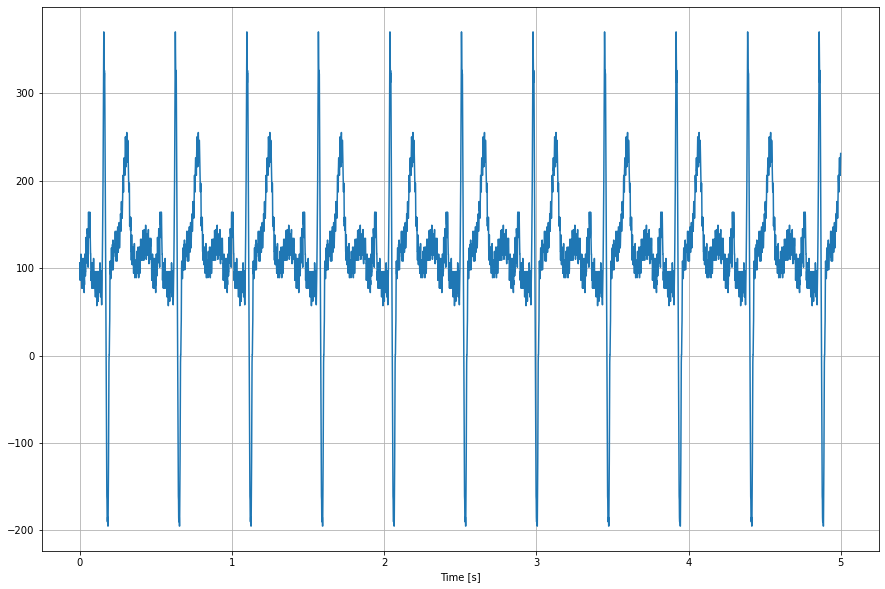

In [5]:
#name = input("enter name: ")
signal = pd.read_csv('ekg1.txt', names=['column0','column1','column2','column3','column4','column5','column6','column7','column8','column9','column10','column11'], sep=' ')
sf = 1000
plt = show(signal, sf, 'column0')
#save(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\wikto\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

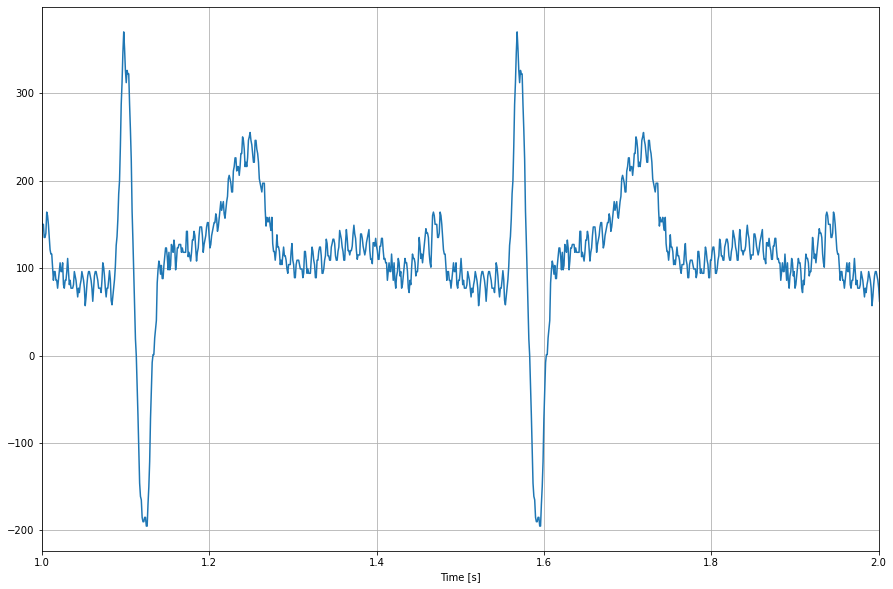

In [4]:
#low = input("lower limit: ")
#upp = input("upper limit: ")
show_crop_x(signal, sf, 'column0', 1, 2)

C:\Users\wikto\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


<module 'matplotlib.pyplot' from 'C:\\Users\\wikto\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

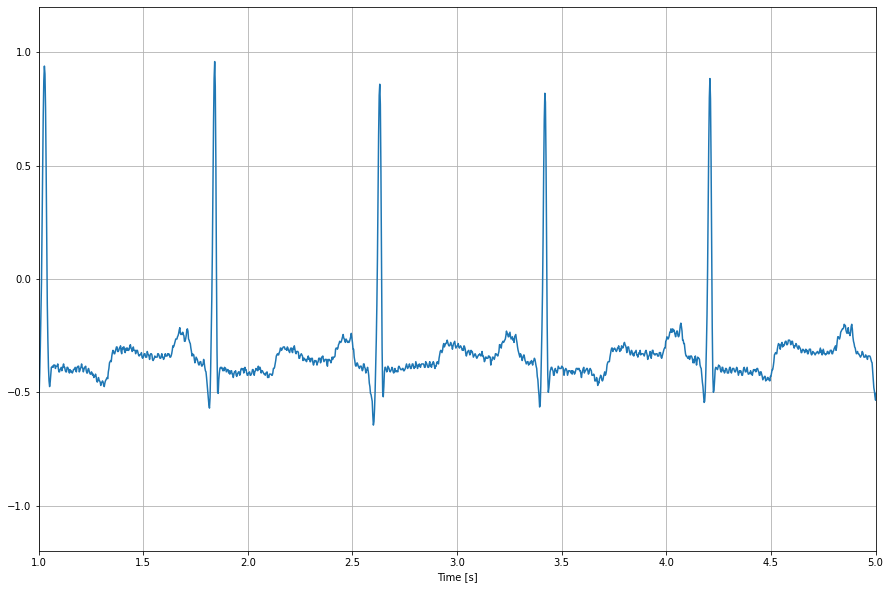

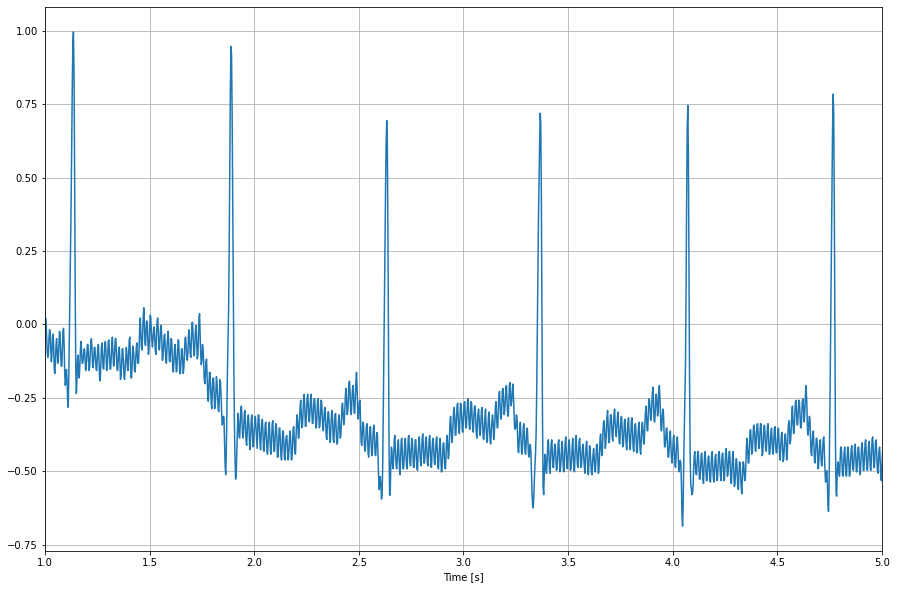

In [5]:
signal = pd.read_csv('ekg100.txt', names=['column0'])
sf = 360 
show_crop_x_y(signal, sf, 'column0', 1, 5, -1.2, 1.2)

signal = pd.read_csv('ekg_noise.txt', names=["time",'val'], sep="  ")
sf = 360 
show_crop_x(signal, sf, 'val', 1, 5)

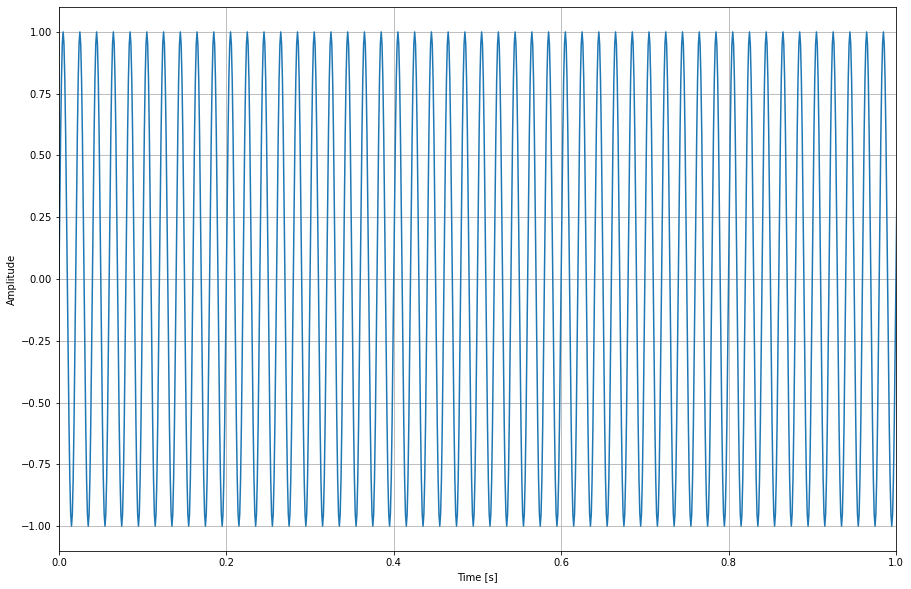

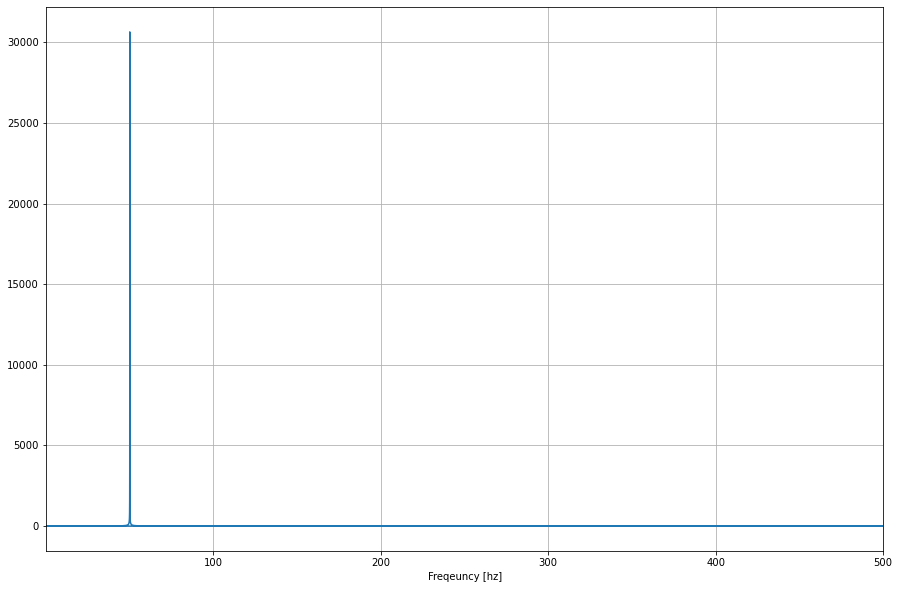

[array([ 0.        ,  0.01525879,  0.03051758, ..., -0.04577637,
        -0.03051758, -0.01525879]),
 array([2.65687576-0.j        , 2.65687596+0.0009315j ,
        2.65687658+0.00186299j, ..., 2.6568776 -0.00279449j,
        2.65687658-0.00186299j, 2.65687596-0.0009315j ])]

In [6]:
n = 65536 #samples number
sf = 1000 # samples rate
f = 50 # frequency

x, y = sinus(n, sf, f)

plt.figure(figsize=(15,10))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.grid(True)
plt.xlim(0,1)
plt.plot(x / sf, y)

spectrum(n, y)

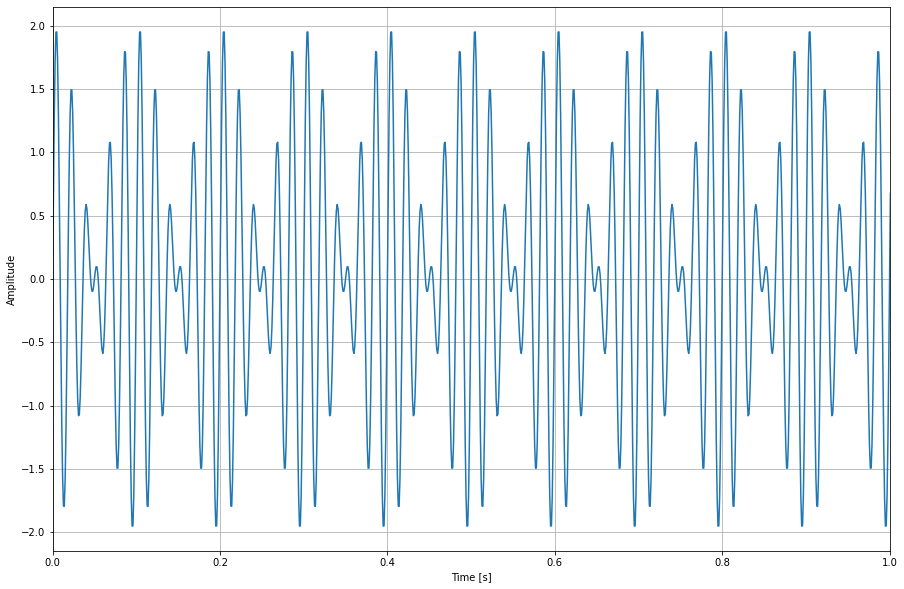

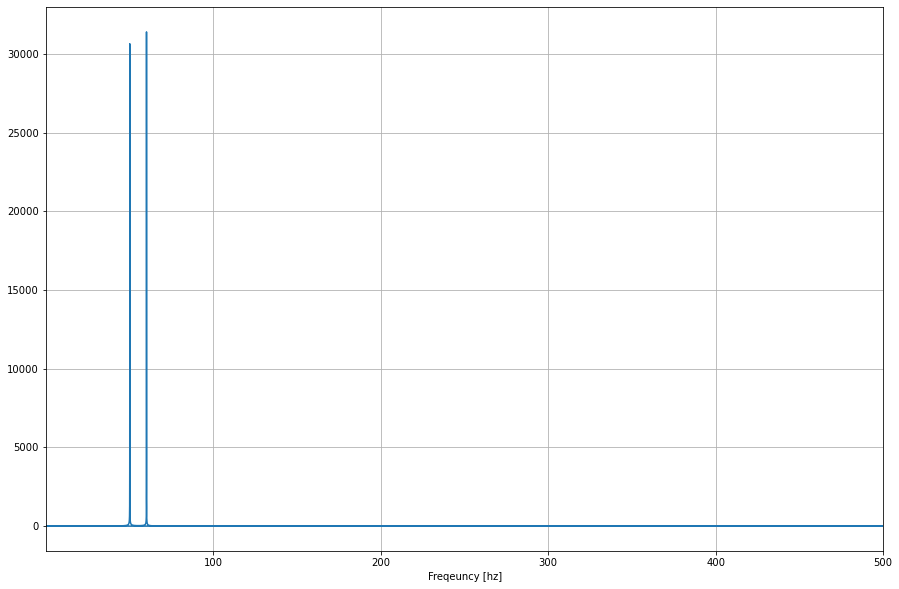

C:\Users\wikto\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


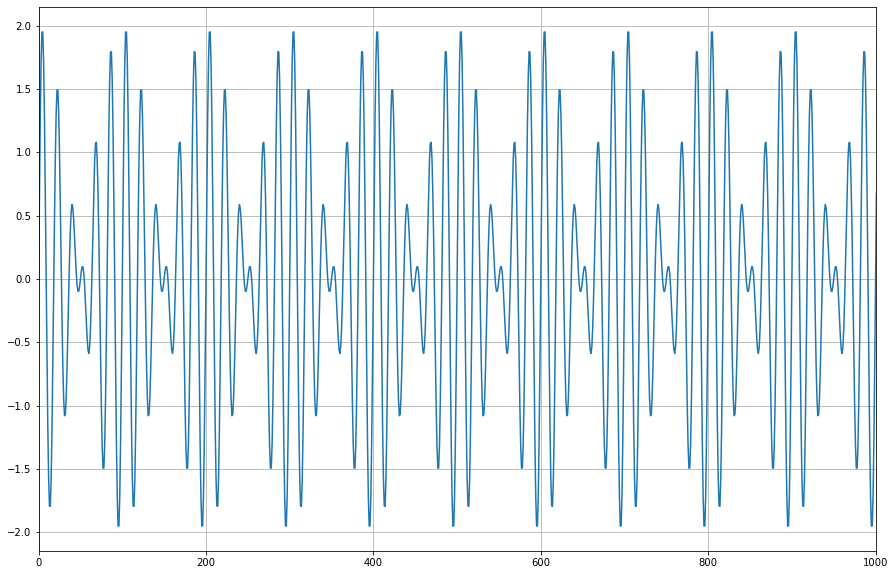

In [7]:
n = 65536 #samples number
sf = 1000 # samples rate
f1 = 50 # frequency
f2 = 60 # frequency

x1, y1 = sinus(n, sf, f1)
x2, y2 = sinus(n, sf, f2)
x = x1
y = y1 + y2

plt.figure(figsize=(15,10))
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.grid(True)
plt.xlim(0,1)
plt.plot(x / sf, y)

xf, yf = spectrum(n, y)

x, y = inv_spectrum(n, yf)

plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlim(0,1000)
plt.plot(x , y)

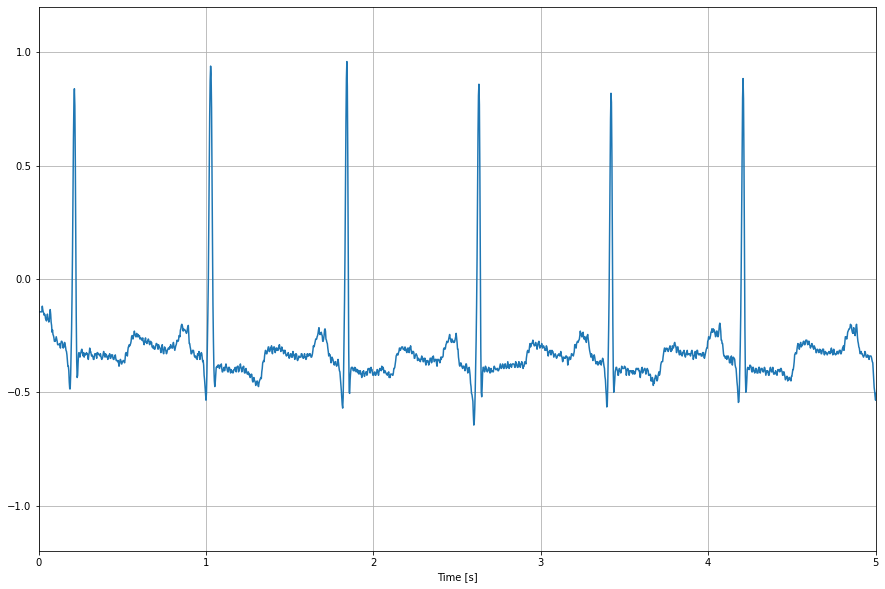

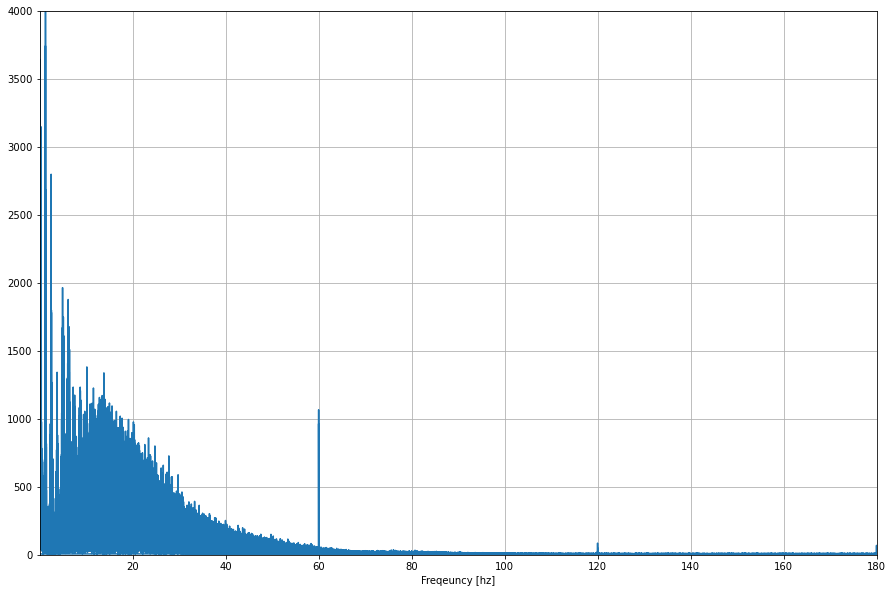

C:\Users\wikto\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\wikto\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


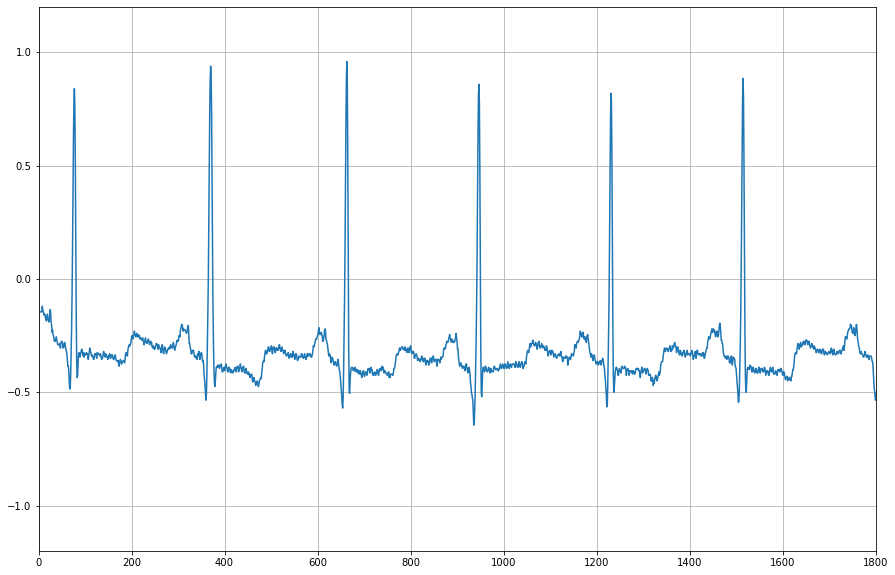

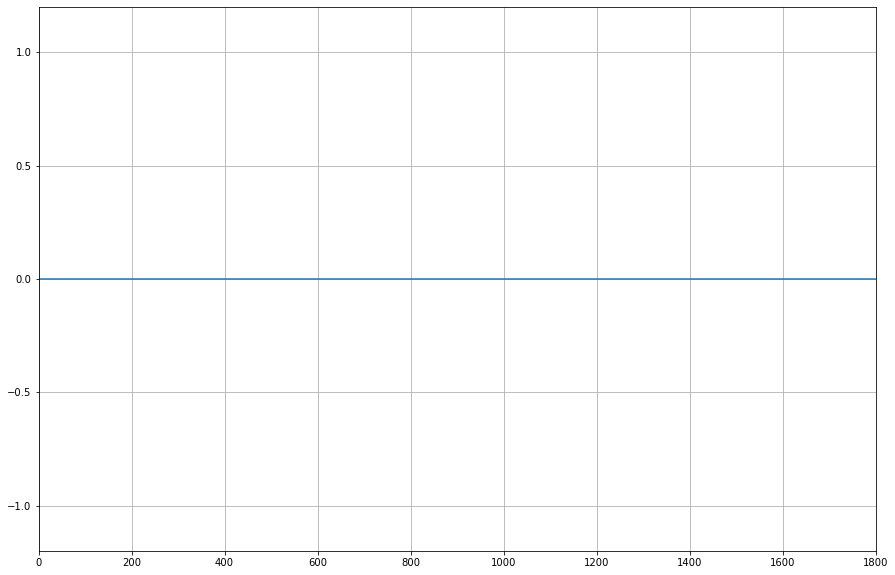

In [8]:
signal = pd.read_csv('ekg100.txt', names=['column0'])
sf = 360
show_crop_x_y(signal, sf, 'column0', 0, 5, -1.2, 1.2)

xf, yf = spectrum_y(signal.index.size, signal['column0'].to_numpy(), 4000)

x, y = inv_spectrum(signal.index.size, yf)

plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlim(0,1800)
plt.ylim(-1.2, 1.2)
plt.plot(x , y)

plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlim(0,1800)
plt.ylim(-1.2, 1.2)
plt.plot(signal.index / sf, signal['column0'] - y)


C:\Users\wikto\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


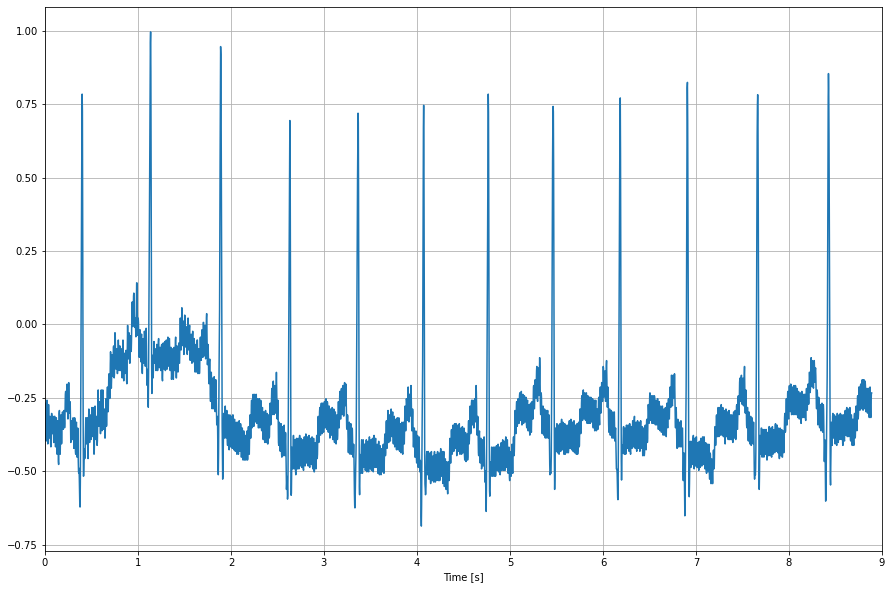

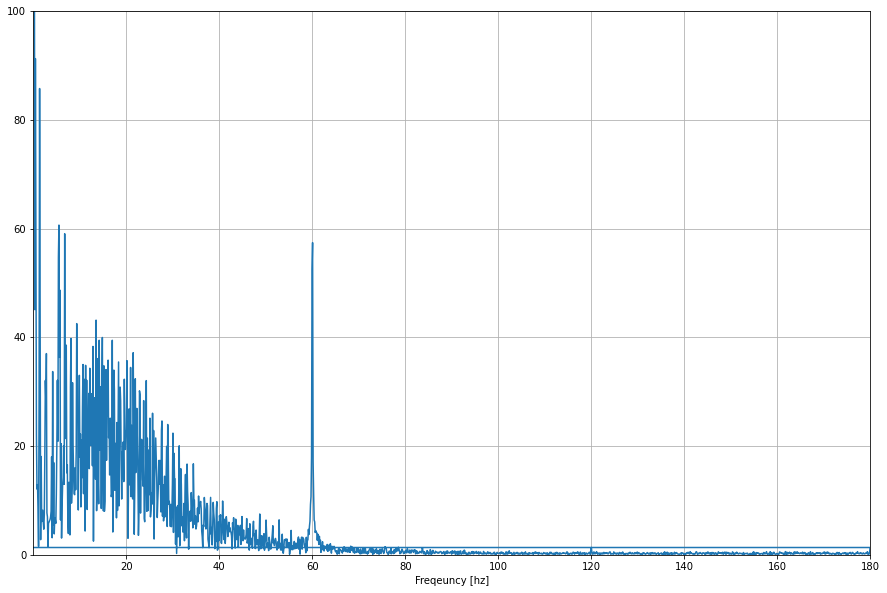

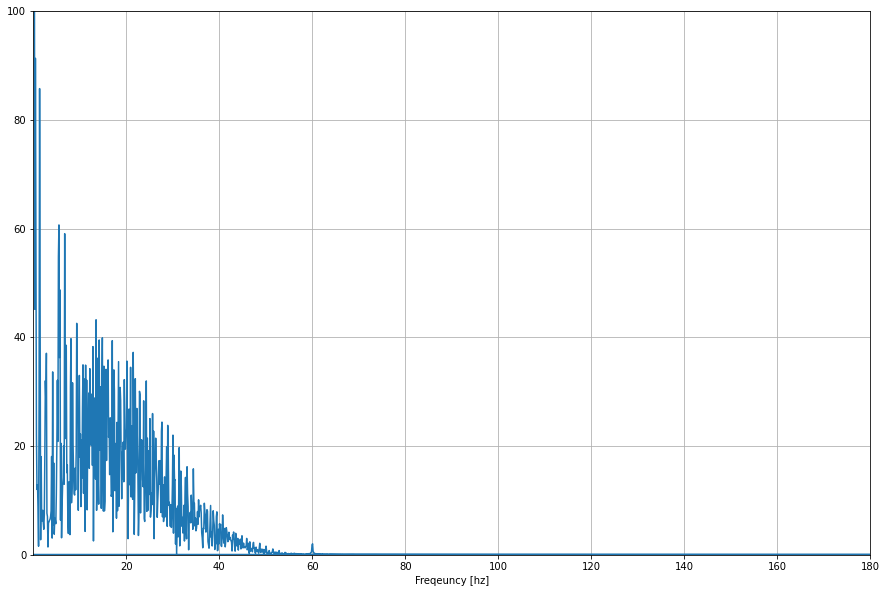

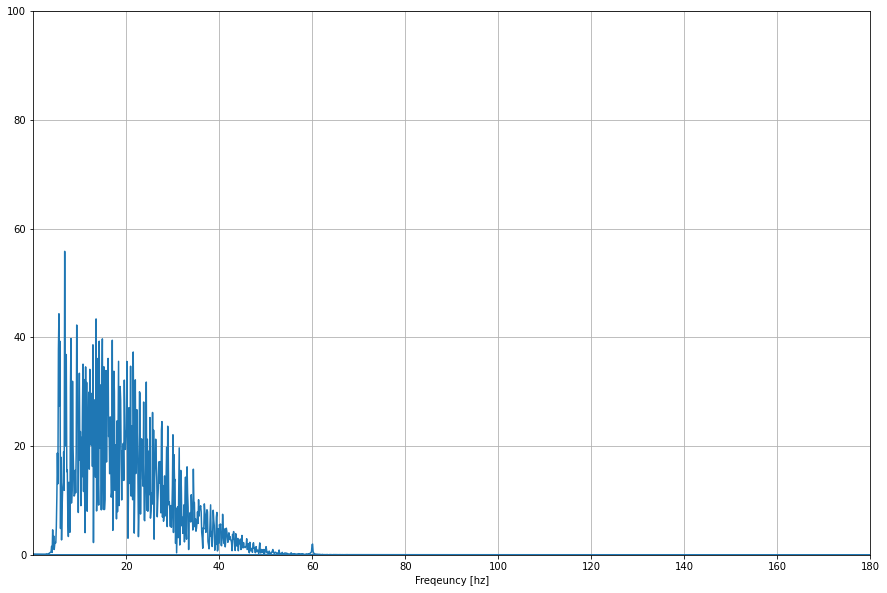

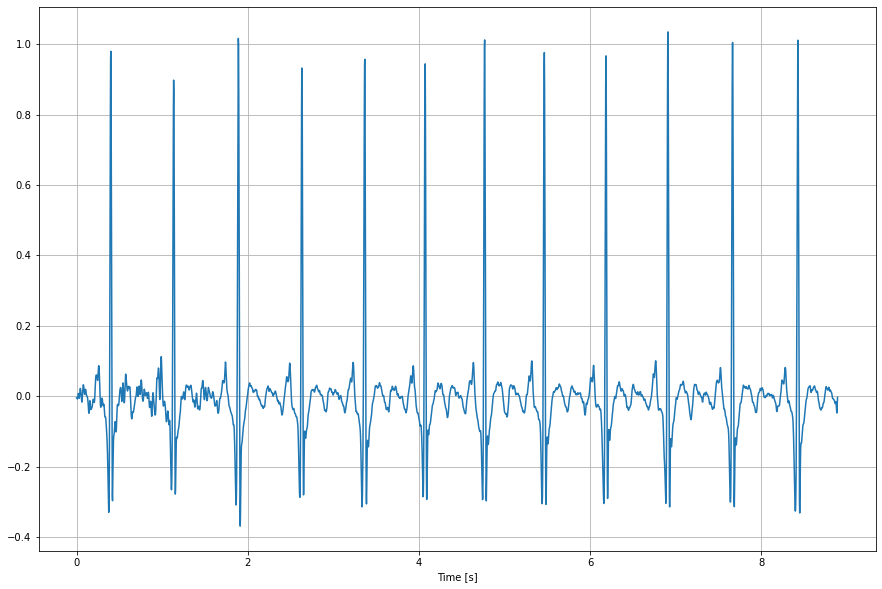

In [6]:
import scipy
from scipy import signal
signal = pd.read_csv('ekg_noise.txt', names=["time",'val'], sep="  ")
sf = 360 
show_crop_x(signal, sf, 'val', 0, 9)

xf, yf = spectrum_y(signal.index.size, signal['val'].to_numpy(), 100)

order = 5 ##
cutoff_freq = 45 ##
normalized_cutoff_freq = 2 * cutoff_freq  / sf
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq, 'lowpass')
signal_b = scipy.signal.filtfilt(numerator_coeffs, denominator_coeffs, signal['val'])

xf, yf = spectrum_y(signal.index.size, signal_b, 100)

order = 5 ##
cutoff_freq = 5 ##
normalized_cutoff_freq = 2 * cutoff_freq  / sf
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq, 'highpass')
signal_a_b = scipy.signal.filtfilt(numerator_coeffs, denominator_coeffs, signal_b)

xf, yf = spectrum_y(signal.index.size, signal_a_b, 100)

plt.figure(figsize=(15,10))
plt.xlabel('Time [s]')
plt.grid()
plt.plot(signal.index / sf, signal_a_b)

